<a href="https://colab.research.google.com/github/opasniyzapuper/mldl1/blob/main/%D0%9B%D0%B0%D0%B1_3_%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%A0%D0%BE%D0%B6%D0%BE%D0%BA_%D0%98%D0%A310_91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', sep=',')

data.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Выполним очистку данных как и в прошлых работах

In [ ]:
data = data.drop(['oldpeak'], axis='columns')

In [ ]:
X = data[data.columns[:-1]]
y = data['target']

In [ ]:
X.shape

(303, 12)

Логистическая модель в sklearn реализована в классе LogisticRegression библиотеки linear_model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.(прекращается процесс обучения когда приближаемся к локальному минимому равному переменной tol)
    tol=1e-4,
    # Так как распознается 2 класса. 
    multi_class='ovr'
)

In [ ]:
model.fit(X, y)

LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

In [ ]:
predictions = model.predict(X) #предсказанные значения

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y, predictions)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,107,31
1,18,147


In [ ]:
prediction_test = model.predict_proba(X)

In [ ]:
predictions = prediction_test[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)
#frp - false positive rate (горизонтальная ось)
#tpr (recall) - true positive rate (вертикальная ось)
# каждая точка на графике ROC AUC соответствует выбору некоторого порога (про это ниже)

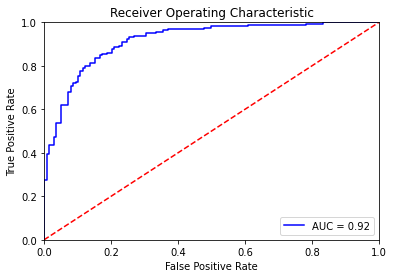

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

penalty='l2' C=1 AUC = 0.92

penalty='l2' C=1e2 AUC = 0.92

penalty='l2' C=1e4 AUC = 0.92

penalty='l1' C=1 AUC = 0.92

penalty='l1' C=1e2 AUC = 0.92

penalty='l1' C=1e4 AUC = 0.92

переменные tol и multi_class не менялись

In [ ]:
model.coef_

array([[ 0.00639176, -1.50098765,  0.75422963, -0.01852612, -0.00421272,
         0.07348674,  0.40070465,  0.03051363, -0.88168757,  0.89207342,
        -0.77862796, -0.81651849]])

In [ ]:
col = [i for i in range(len(model.coef_[0]))]
listValues = model.coef_[0]
a = list()
for i in range(0, len(col), 1):
  if listValues[i] < 0.01:
    a.append(col[i])
print(a)

[0, 1, 3, 4, 8, 10, 11]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   slope     303 non-null    int64
 10  ca        303 non-null    int64
 11  thal      303 non-null    int64
 12  target    303 non-null    int64
dtypes: int64(13)
memory usage: 30.9 KB


In [ ]:
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', sep=',')
columns = data.columns
for i in a:
     data1.drop([columns[i]], axis = 1, inplace = True)

In [ ]:
data.info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   slope     303 non-null    int64
 10  ca        303 non-null    int64
 11  thal      303 non-null    int64
 12  target    303 non-null    int64
dtypes: int64(13)
memory usage: 30.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       303 non-null    int64  
 1   fbs      303 non-null    int64  
 2   restecg  303 non-null    int64  
 3   t

In [ ]:
X = data1[data1.columns[:-1]]
y = data1['target']
X.shape

(303, 6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6842105263157895